In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import seaborn as sns
import pathlib
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'E:\\IUB\\Explainable-AI-Fraud-Detection\\data\\raw\\Credit_Risk_Dataset.xlsx'
sheet_names= ['loan_information', 'Employment','Personal_information', 'Other_information' ]



In [3]:
def read_excel_data(file_path, sheet_names):

    data_frames = []
    
    # Reading each sheet from the Excel file and store it in a list of DataFrames
    for sheet_name in sheet_names:
        data_frame = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
        data_frames.append(data_frame)
    
    return data_frames



dfs = read_excel_data(path, sheet_names)

loan_information = dfs[0]
employment = dfs[1]
personal_information = dfs[2]
other_information = dfs[3]

In [4]:
loan_information.head(5)
employment.head(5)
personal_information.head(5)
other_information.head(5)

User_id  Delinq_2yrs  Total Payement   Received Principal  \
0  7013527            0      1824.150000              971.46   
1  7014291            0     22912.532998            18000.00   
2  7014327            0      7800.440000             4489.76   
3  7014304            0      6672.050000             5212.29   
4  7031995            0     11793.001345            10000.00   

   Interest Received  Number of loans  Defaulter  
0             852.69                0          1  
1            4912.53                0          0  
2            3310.68                0          1  
3            1459.76                0          0  
4            1793.00                0          0

### Merge the data 

In [5]:
# Merging 'loan_information' and 'Employment' dataframes based on 'User_id'
merged_df = pd.merge(loan_information, employment, left_on='User_id', right_on='User id')

# Merging the previously merged dataframe with 'personal_information' based on 'User_id'
merged_df = pd.merge(merged_df, personal_information, left_on='User_id', right_on='User id')

# Merging the previously merged dataframe with 'other_information' based on 'User_id'
merged_df = pd.merge(merged_df, other_information, left_on='User_id', right_on='User_id')

df=merged_df

df.head()

User_id  Loan Category   Amount  Interest Rate  Tenure(years)  User id_x  \
0  7013527  Consolidation  55884.0          11.84              6    7013527   
1  7014291  Consolidation  55511.0          16.94              4    7014291   
2  7014327  Consolidation  12289.0          11.84              6    7014327   
3  7014304    Credit Card  29324.0          14.71              4    7014304   
4  7031995    Credit Card  30252.0          14.71              4    7031995   

     Employmet type Tier of Employment  \
0          Salaried                  B   
1  Self - Employeed                  D   
2               NaN                NaN   
3               NaN                NaN   
4               NaN                NaN   

                                            Industry  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   

                               Role  ...      Home  Pincode  Social Profile  \
0  KHMbckjadbckIFGAZSEWdkcndwkcnCCM  ...      rent   XX852X              No   
1  KHMbckjadbckIFGNCSEWdkcndwkcnCCM  ...  mortgage   XX286X             NaN   
2  KHMbckjadbckIFGNYSEWdkcndwkcnCCM  ...       own   XX113X              No   
3  KHMbckjadbckIFGCASEWdkcndwkcnCCM  ...      rent   XX941X             Yes   
4  KHMbckjadbckIFGCASEWdkcndwkcnCCM  ...      rent   XX913X              No   

       Is_verified Delinq_2yrs  Total Payement  Received Principal  \
0              NaN           0      1824.150000             971.46   
1  Source Verified           0     22912.532998           18000.00   
2              NaN           0      7800.440000            4489.76   
3              NaN           0      6672.050000            5212.29   
4         Verified           0     11793.001345           10000.00   

  Interest Received Number of loans Defaulter  
0            852.69               0         1  
1           4912.53               0         0  
2           3310.68               0         1  
3           1459.76               0         0  
4           1793.00               0         0  

[5 rows x 26 columns]

### EDA

In [6]:
df.dtypes

User_id                 int64
Loan Category          object
Amount                float64
Interest Rate         float64
Tenure(years)           int64
User id_x               int64
Employmet type         object
Tier of Employment     object
Industry               object
Role                   object
Work Experience        object
Total Income(PA)      float64
User id_y               int64
Gender                 object
Married                object
Dependents              int64
Home                   object
Pincode                object
Social Profile         object
Is_verified            object
Delinq_2yrs             int64
Total Payement        float64
Received Principal    float64
Interest Received     float64
Number of loans         int64
Defaulter               int64
dtype: object

In [7]:
df.describe().T

count          mean           std        min  \
User_id             143727.0  3.733474e+07  3.182811e+07  208036.00   
Amount              111803.0  1.376458e+05  1.575427e+05       0.00   
Interest Rate       143727.0  1.203870e+01  3.880204e+00       5.42   
Tenure(years)       143727.0  4.514503e+00  8.742415e-01       4.00   
User id_x           143727.0  3.733474e+07  3.182811e+07  208036.00   
Total Income(PA)    143727.0  7.242256e+04  5.539328e+04    4000.00   
User id_y           143727.0  3.733474e+07  3.182811e+07  208036.00   
Dependents          143727.0  1.997113e+00  1.411317e+00       0.00   
Delinq_2yrs         143727.0  2.766008e-01  7.890189e-01       0.00   
Total Payement      143727.0  1.084088e+04  8.613422e+03       0.00   
Received Principal  143727.0  8.407002e+03  7.224396e+03       0.00   
Interest Received   143727.0  2.352730e+03  2.447760e+03       0.00   
Number of loans     143727.0  5.573066e-03  9.878462e-02       0.00   
Defaulter           143727.0  9.371239e-02  2.914292e-01       0.00   

                            25%          50%           75%           max  
User_id             3276118.000  57665174.00  6.729174e+07  7.895894e+07  
Amount                28379.500     76603.00  2.054645e+05  8.000078e+06  
Interest Rate             9.180        11.84  1.444000e+01  2.354000e+01  
Tenure(years)             4.000         4.00  6.000000e+00  6.000000e+00  
User id_x           3276118.000  57665174.00  6.729174e+07  7.895894e+07  
Total Income(PA)      45000.000     61800.00  8.600000e+04  7.141778e+06  
User id_y           3276118.000  57665174.00  6.729174e+07  7.895894e+07  
Dependents                1.000         2.00  3.000000e+00  4.000000e+00  
Delinq_2yrs               0.000         0.00  0.000000e+00  2.200000e+01  
Total Payement         4674.775      8212.41  1.417577e+04  5.777758e+04  
Received Principal     3104.160      6000.00  1.166436e+04  3.500001e+04  
Interest Received       841.685      1632.24  2.904770e+03  2.420562e+04  
Number of loans           0.000         0.00  0.000000e+00  5.000000e+00  
Defaulter                 0.000         0.00  0.000000e+00  1.000000e+00

### Missing Values

In [8]:
df.isnull().sum()

User_id                   0
Loan Category             0
Amount                31924
Interest Rate             0
Tenure(years)             0
User id_x                 0
Employmet type        84642
Tier of Employment    84642
Industry                  4
Role                      0
Work Experience           4
Total Income(PA)          0
User id_y                 0
Gender                    0
Married               48143
Dependents                0
Home                      0
Pincode                   0
Social Profile        47856
Is_verified           35803
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

- We can drop Industry, work experience as only 4 rows are there to be removed.
- Secondly, lets replace "N/A" with "missing" as a new category for Social profile, is Verified, Married  because of the large amount of missing values.
- Amount, Employment type, Tier of Employment - yet to be decided.

In [9]:
df= df.dropna(subset=["Industry","Work Experience"])

In [10]:
def replace_null_values_with_a_value(df, columns,value):
    # Replacing null values with "missing" in specific columns
    for column in columns:
        df[column] = df[column].fillna(value)
    return df

replace_with = "missing"
columns_to_replace = ["Social Profile", "Is_verified", "Married", "Employmet type"]
df= replace_null_values_with_a_value(df, columns_to_replace, replace_with)

In [11]:
#Creating a new variable "amount_missing" to indicate if the 'Amount' is missing or not. 
#Assigning 1 if 'Amount' is null, otherwise assign 0.
df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)

#Replacing the null values in the 'Amount' column with the value "-1000" to differentiate them from the rest of the data.
replace_with= - 1000
columns_to_replace = ['Amount']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

In [12]:
# Replacing the null values in the 'Tier of Employment' column with the string "Z" to categorize them separately.
replace_with='Z'
columns_to_replace = ['Tier of Employment']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

In [13]:
df.isnull().sum()


User_id               0
Loan Category         0
Amount                0
Interest Rate         0
Tenure(years)         0
User id_x             0
Employmet type        0
Tier of Employment    0
Industry              0
Role                  0
Work Experience       0
Total Income(PA)      0
User id_y             0
Gender                0
Married               0
Dependents            0
Home                  0
Pincode               0
Social Profile        0
Is_verified           0
Delinq_2yrs           0
Total Payement        0
Received Principal    0
Interest Received     0
Number of loans       0
Defaulter             0
amount_missing        0
dtype: int64

### Handling categorical columns

In [14]:
# Lets remove the categorical columns with many categories in it

def unique_values_each_column(df):
    # Print number of unique values in all columns
    for col in df.columns:
        if df[col].dtype == 'object':

            print(col, ':', df[col].nunique())

unique_values_each_column(df)

Loan Category : 7
Employmet type : 3
Tier of Employment : 8
Industry : 12974
Role : 46
Work Experience : 7
Gender : 3
Married : 3
Home : 5
Pincode : 844
Social Profile : 3
Is_verified : 4


#### We see "Industry", "Role", "Pincode" has too many categories so in our case we could remove those in order to eliminate high dimensionality.

In [15]:

def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
      df.drop(column, axis=1, inplace=True)

    return df


columns_to_drop = ["Industry", "Role", "Pincode", 'User_id','User id_x','User id_y']
drop_columns(df, columns_to_drop)

Loan Category    Amount  Interest Rate  Tenure(years)  \
0       Consolidation   55884.0          11.84              6   
1       Consolidation   55511.0          16.94              4   
2       Consolidation   12289.0          11.84              6   
3         Credit Card   29324.0          14.71              4   
4         Credit Card   30252.0          14.71              4   
...               ...       ...            ...            ...   
143722    Credit Card  287564.0          12.06              6   
143723         Other    49612.0          14.10              4   
143724  Consolidation   13632.0          18.96              6   
143725           Home  186923.0           8.28              4   
143726  Consolidation  181161.0          15.87              6   

          Employmet type Tier of Employment Work Experience  Total Income(PA)  \
0               Salaried                  B             1-2          125000.0   
1       Self - Employeed                  D             10+           61000.0   
2                missing                  Z            5-10          100000.0   
3                missing                  Z             2-3           30000.0   
4                missing                  Z             10+           65000.0   
...                  ...                ...             ...               ...   
143722           missing                  Z               0          100000.0   
143723           missing                  Z               0           27000.0   
143724           missing                  Z               0           53000.0   
143725           missing                  Z               0           75400.0   
143726          Salaried                  D               0           78000.0   

        Gender  Married  ...      Home Social Profile      Is_verified  \
0       Female      Yes  ...      rent             No          missing   
1       Female       No  ...  mortgage        missing  Source Verified   
2        Other  missing  ...       own             No          missing   
3         Male  missing  ...      rent            Yes          missing   
4         Male  missing  ...      rent             No         Verified   
...        ...      ...  ...       ...            ...              ...   
143722  Female       No  ...  mortgage        missing  Source Verified   
143723    Male      Yes  ...      rent             No  Source Verified   
143724  Female      Yes  ...      rent        missing          missing   
143725   Other       No  ...  mortgage        missing  Source Verified   
143726   Other  missing  ...  mortgage            Yes     Not Verified   

       Delinq_2yrs  Total Payement   Received Principal  Interest Received  \
0                0      1824.150000              971.46             852.69   
1                0     22912.532998            18000.00            4912.53   
2                0      7800.440000             4489.76            3310.68   
3                0      6672.050000             5212.29            1459.76   
4                0     11793.001345            10000.00            1793.00   
...            ...              ...                 ...                ...   
143722           1     12842.400000             7193.83            5648.57   
143723           0       839.200000              581.67             257.53   
143724           0      6085.800000             2434.49            3651.31   
143725           0      4080.640000             3286.82             793.82   
143726           0     10064.160000             4702.66            5361.50   

        Number of loans  Defaulter  amount_missing  
0                     0          1               0  
1                     0          0               0  
2                     0          1               0  
3                     0          0               0  
4                     0          0               0  
...                 ...        ...             ...  
143722                0          0               0  
1437

In [16]:

df['Defaulter'].value_counts()

Defaulter
0    130254
1     13469
Name: count, dtype: int64

We can see there is an imbalance issue which we would solve in future

### Multicollinearity

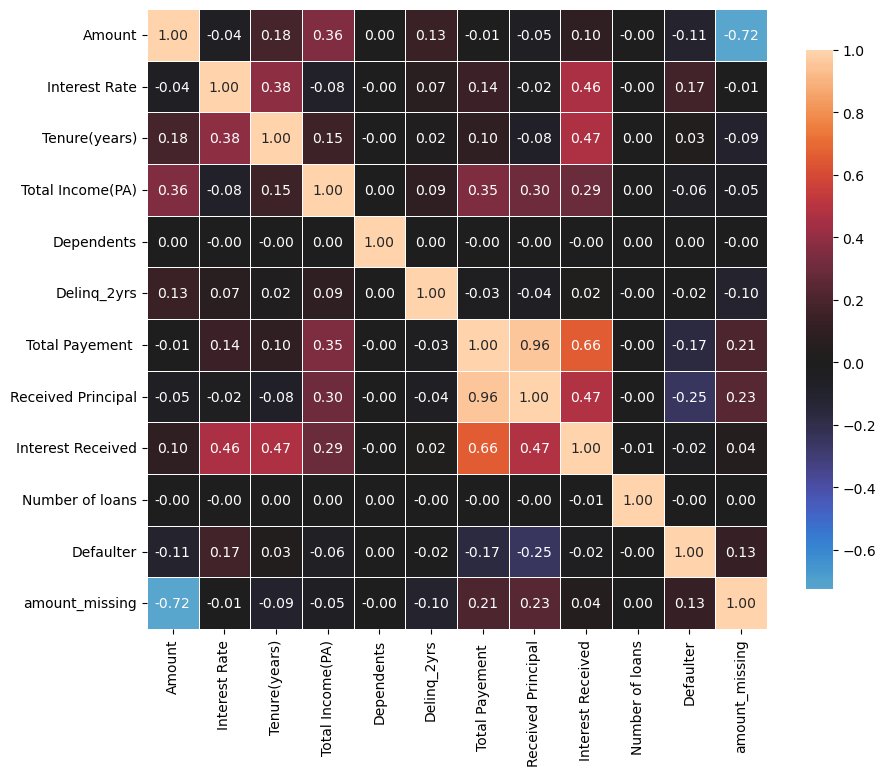

In [17]:
# Calculate the spearman correlation matrix : to be safe with nonlinear relationship

def correlation_heatmap(train):

    correlations = train.corr(method='spearman')
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths= .5, annot =True, cbar_kws={"shrink": .70})
    plt.show()

object_columns = df.select_dtypes(exclude=['object'])
correlation_heatmap(object_columns)


Observations:
            - No two variables have high correlation with each other, so there is no issue of multicollinearity. It's safe to use all variables in machine learning model building.
            
For more sound explanation we can plot pair plots 

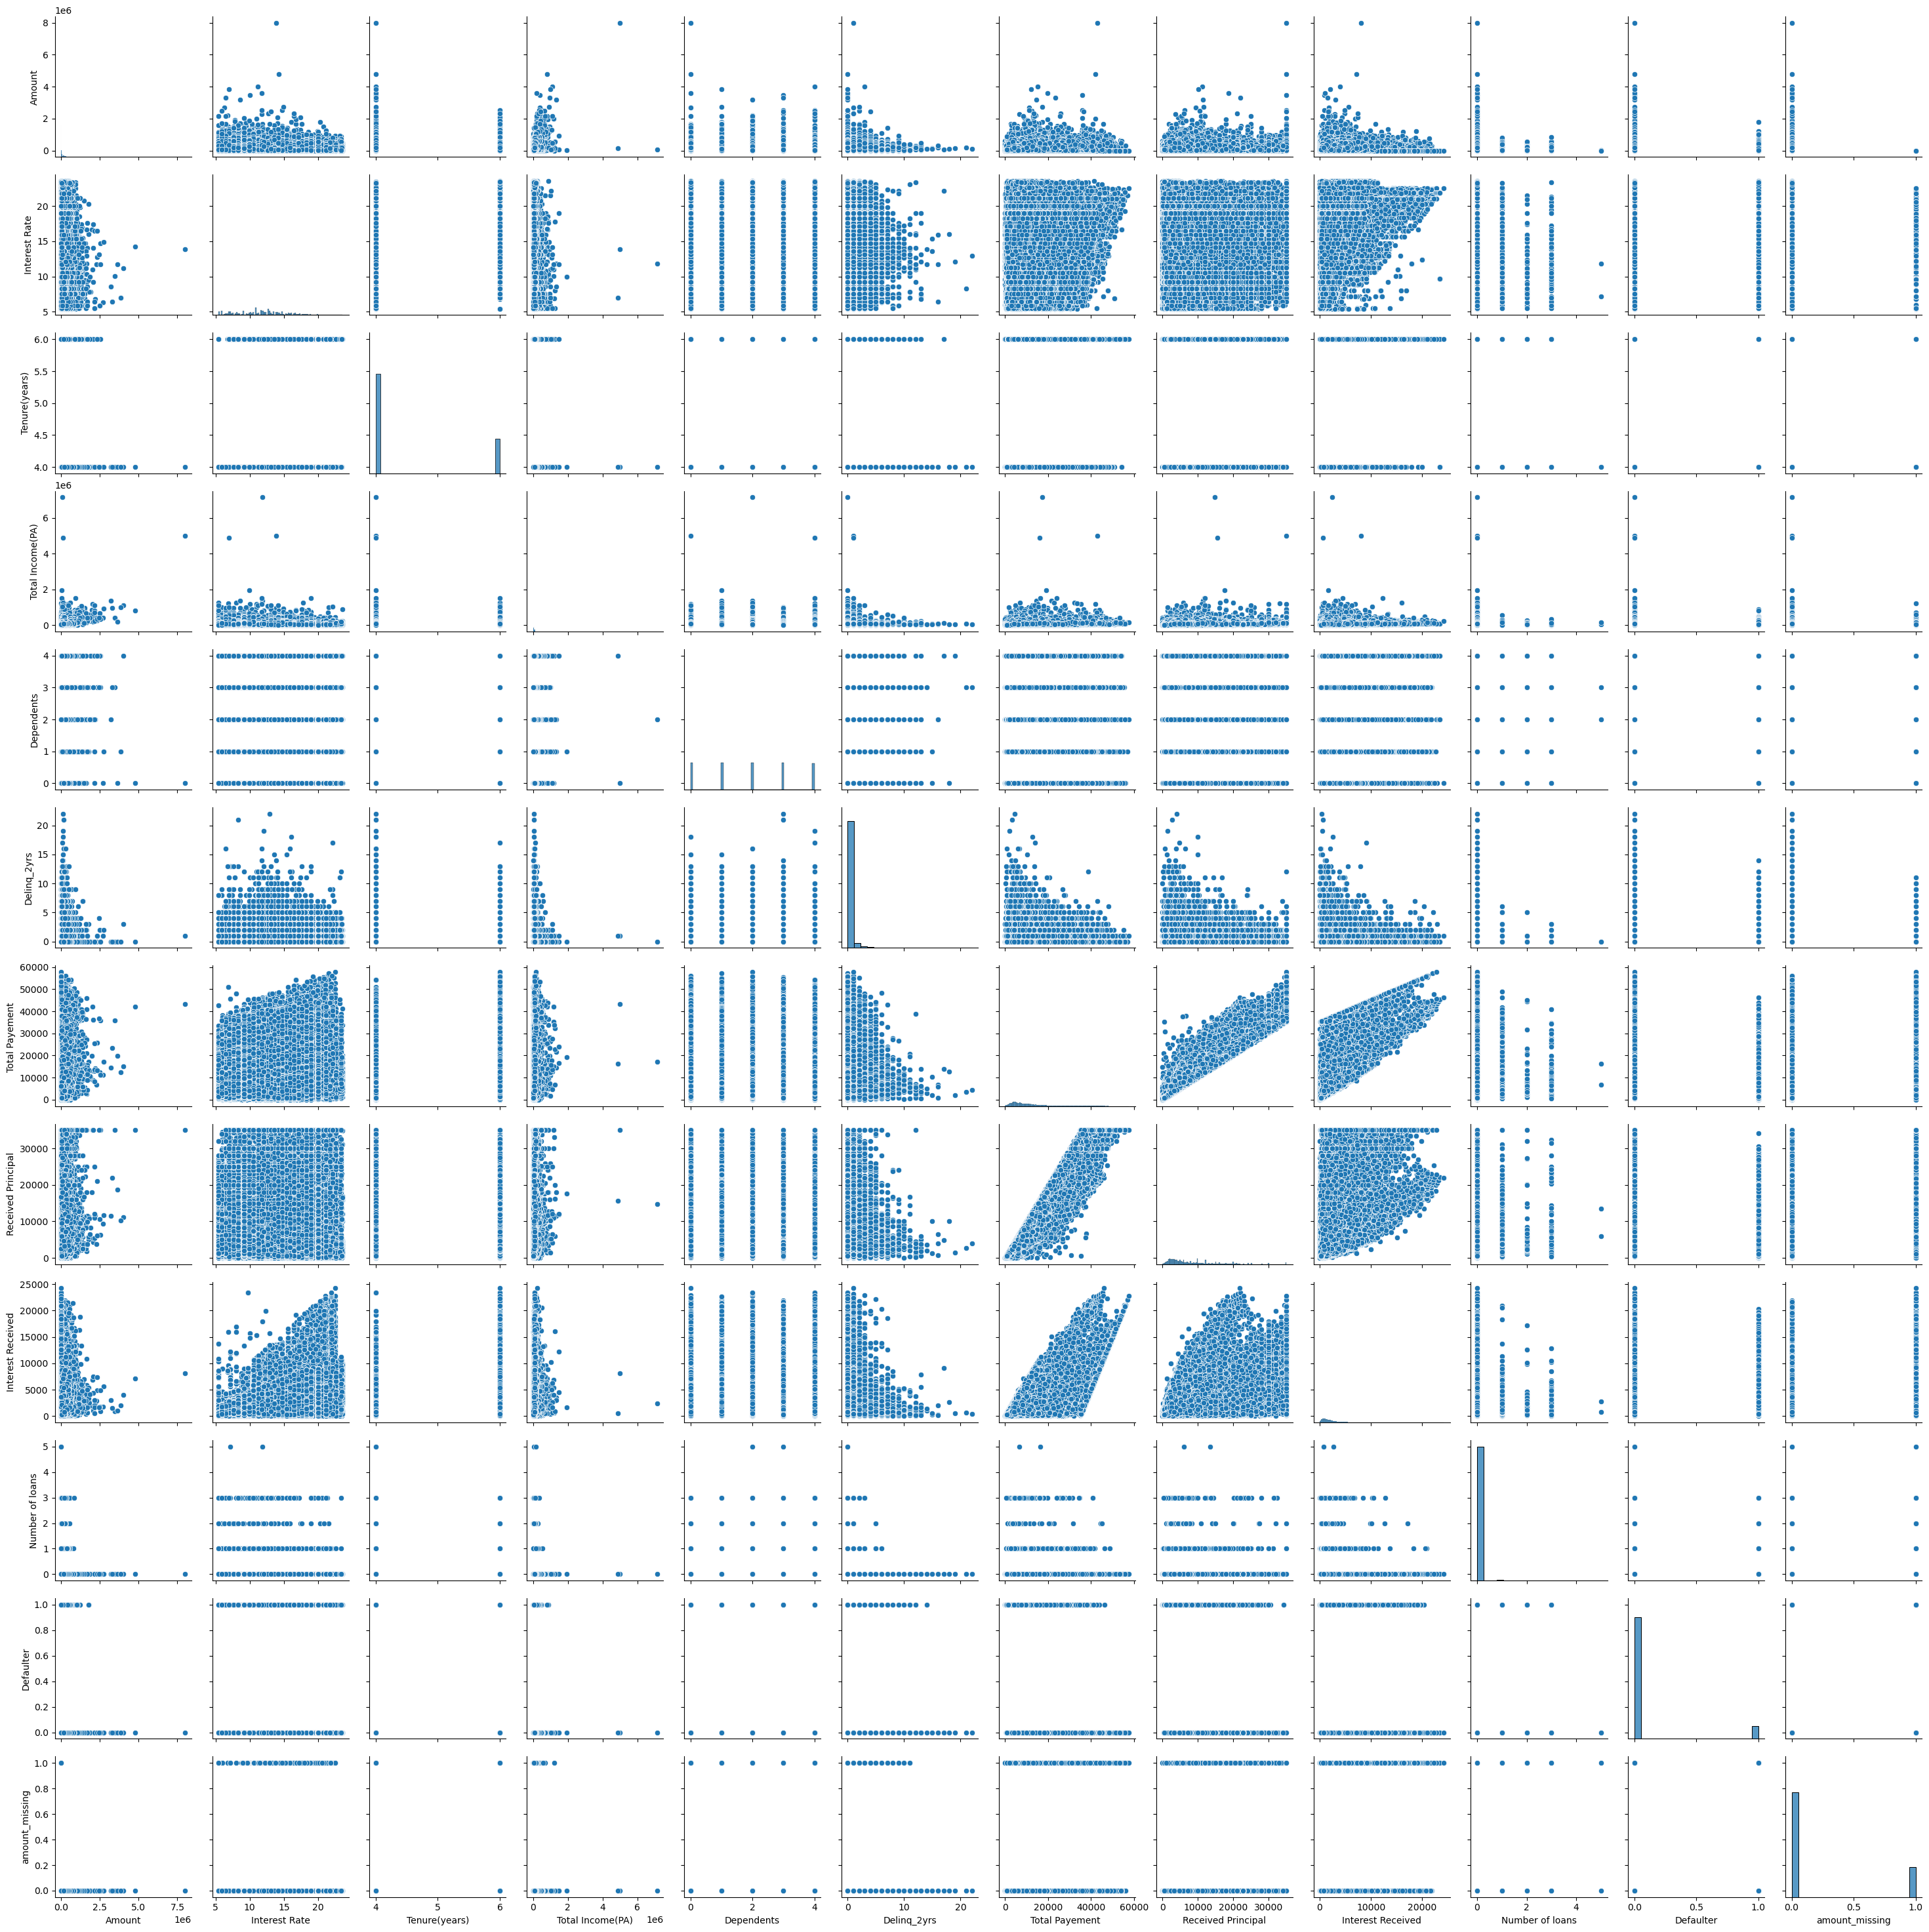

In [18]:
def plot_pairwise_scatter(df):
    # Get the list of numeric features
    features = df.select_dtypes(include='number').columns

    # Create the pairwise scatter plots using Seaborn
    sns.pairplot(df[features])

plot_pairwise_scatter(df)


### Skewness


In [19]:

import nbformat

def Feature_Distributions_Histogram(df):
    # Generate histograms for each column
    for c in df.columns:
        fig = px.histogram(df, x=c, hover_data=df.columns)
        fig.show()


Feature_Distributions_Histogram(df)


'import nbformat\n\ndef Feature_Distributions_Histogram(df):\n    # Generate histograms for each column\n    for c in df.columns:\n        fig = px.histogram(df, x=c, hover_data=df.columns)\n        fig.show()\n\n\nFeature_Distributions_Histogram(df)\n'

Let's quantify skewness 
skewness = 3 * (mean - median)/std

- To address the presence of outliers in skewed data, we'll first correct the skewness.
- we can use z-score, such as setting a threshold of 3 std for eg. If we encounter a data point greater than that we can consider it as outlier and remove it from the data set 

In [20]:
#considering the important features to start with determining the skweness
features_log= ['Amount','Interest Rate','Tenure(years)','Dependents','Total Payement ','Received Principal','Interest Received']

def fix_skewness(df, features):
  features_log = features
  for f in features_log:
    sk= df[f].skew()
    print("Inital skewness in feature: ",f," is: ", sk)

    if sk>3 or sk< -3:

      Log_Fare = df[f].map(lambda i: np.log(i) if i > 0 else 0)
      df[f]=Log_Fare
      print("Final skewness in feature: ",f," is: ", Log_Fare.skew())
      fig = px.histogram(Log_Fare, x=f)
      fig.show()
  
  return df


fix_skewness(df, features_log)

Inital skewness in feature:  Amount  is:  4.263131668127465
Final skewness in feature:  Amount  is:  -1.1506200219575988


Inital skewness in feature:  Interest Rate  is:  0.35701836819248667
Inital skewness in feature:  Tenure(years)  is:  1.110725712963069
Inital skewness in feature:  Dependents  is:  0.0009324906324210873
Inital skewness in feature:  Total Payement   is:  1.56758246496732
Inital skewness in feature:  Received Principal  is:  1.5217975693302848
Inital skewness in feature:  Interest Received  is:  2.8360693754096626


Loan Category     Amount  Interest Rate  Tenure(years)  \
0       Consolidation  10.931033          11.84              6   
1       Consolidation  10.924336          16.94              4   
2       Consolidation   9.416460          11.84              6   
3         Credit Card  10.286162          14.71              4   
4         Credit Card  10.317318          14.71              4   
...               ...        ...            ...            ...   
143722    Credit Card  12.569201          12.06              6   
143723         Other   10.811988          14.10              4   
143724  Consolidation   9.520175          18.96              6   
143725           Home  12.138452           8.28              4   
143726  Consolidation  12.107141          15.87              6   

          Employmet type Tier of Employment Work Experience  Total Income(PA)  \
0               Salaried                  B             1-2          125000.0   
1       Self - Employeed                  D             10+           61000.0   
2                missing                  Z            5-10          100000.0   
3                missing                  Z             2-3           30000.0   
4                missing                  Z             10+           65000.0   
...                  ...                ...             ...               ...   
143722           missing                  Z               0          100000.0   
143723           missing                  Z               0           27000.0   
143724           missing                  Z               0           53000.0   
143725           missing                  Z               0           75400.0   
143726          Salaried                  D               0           78000.0   

        Gender  Married  ...      Home Social Profile      Is_verified  \
0       Female      Yes  ...      rent             No          missing   
1       Female       No  ...  mortgage        missing  Source Verified   
2        Other  missing  ...       own             No          missing   
3         Male  missing  ...      rent            Yes          missing   
4         Male  missing  ...      rent             No         Verified   
...        ...      ...  ...       ...            ...              ...   
143722  Female       No  ...  mortgage        missing  Source Verified   
143723    Male      Yes  ...      rent             No  Source Verified   
143724  Female      Yes  ...      rent        missing          missing   
143725   Other       No  ...  mortgage        missing  Source Verified   
143726   Other  missing  ...  mortgage            Yes     Not Verified   

       Delinq_2yrs  Total Payement   Received Principal  Interest Received  \
0                0      1824.150000              971.46             852.69   
1                0     22912.532998            18000.00            4912.53   
2                0      7800.440000             4489.76            3310.68   
3                0      6672.050000             5212.29            1459.76   
4                0     11793.001345            10000.00            1793.00   
...            ...              ...                 ...                ...   
143722           1     12842.400000             7193.83            5648.57   
143723           0       839.200000              581.67             257.53   
143724           0      6085.800000             2434.49            3651.31   
143725           0      4080.640000             3286.82             793.82   
143726           0     10064.160000             4702.66            5361.50   

        Number of loans  Defaulter  amount_missing  
0                     0          1               0  
1                     0          0               0  
2                     0          1               0  
3                     0          0               0  
4                     0          0               0  
...                 ...        ...             ...  
143722                0          0           

### Categorical Hot-Encoding


In [22]:
import pandas as pd

#get all the names ordinal + categorical
df.select_dtypes(include='object').columns

# Adding all categorical features 
data = df
categorical_features= ["Gender", "Married", "Home", "Social Profile", "Loan Category", "Employmet type","Is_verified", ]

encoded_data = pd.get_dummies(data, columns=categorical_features)



### Ordinal Encoding

In [27]:
# ordinal categorical features array

from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ["Tier of Employment", "Work Experience"]


data = encoded_data

# Create a custom mapping of categories to numerical labels
tier_employment_order= list(encoded_data["Tier of Employment"].unique())
tier_employment_order.sort()

work_experience_order= [ 0, '<1', '1-2', '2-3', '3-5', '5-10','10+']

custom_mapping = [tier_employment_order, work_experience_order]



def perform_ordinal_encoding(data, ordinal_features, custom_mapping):

    # Perform ordinal encoding using OrdinalEncoder with the custom mapping
    encoder = OrdinalEncoder(categories=custom_mapping)
    data[ordinal_features] = encoder.fit_transform(data[ordinal_features])

    return data


# Call the function to perform ordinal encoding
data = perform_ordinal_encoding(data, ordinal_features, custom_mapping)

### Solving Imbalance issue 

In [29]:
# Specify the name of the target variable column
from imblearn.over_sampling import RandomOverSampler

target_column="Defaulter"

def fix_imbalance_using_oversamping(dataframe, target_column):


  # Separate the features and the target variable
  X = dataframe.drop(target_column, axis=1)
  y = dataframe[target_column]

  # Apply random oversampling using RandomOverSampler
  oversampler = RandomOverSampler(random_state=42)
  X, y = oversampler.fit_resample(X, y)

  return X, y


X, y= fix_imbalance_using_oversamping(data, target_column)

NameError: name 'Y' is not defined